# Introduction to Time Series: Lomb Scargle Periodograms II

Sarah Blunt, CIERA/Northwestern

Presented at LSST Discovery Alliance Data Science Fellowship Program Session 20: Time Series

This lesson draws heavily from Jake van der Plas' excellent paper, "Understanding the Lomb-Scargle Periodogram," and all figures are taken directly from that paper unless otherwise noted. 

https://arxiv.org/abs/1703.09824

### Goals for this Lesson:
By the end of this lesson, you will be able to:
- outline the derivation of the Lomb-Scargle periodogram from Fourier and least-squares arguments
- explain how to modify the Lomb-Scargle periodogram to account for observational uncertainties and unknown mean values
- decide on a frequency grid for a dataset of interest [after problem set]
- state limitations of the Lomb-Scargle periodogram 

Yesterday, I showed you a lot of plots that looked like this:

![data-example](../Day1/data-and-images/vanderPlas-fig10.jpg)

Why do we use the Lomb-Scargle periodogram instead of the thing shown in the bottom right? What's the difference?

As a brief reminder, periodograms are *statistical estimators* of the power spectrum, which is the "true" underlying signal we want to estimate through sampling. 

periodogram --> estimator of --> power spectrum = $|\mathcal{F}\{g\}|^2$

Let's construct a periodogram. The most logical thing to do might seem to be to construct the periodogram from the discrete Fourier transform:

$\begin{aligned}P(f)  =\frac{1}{N}\left|\sum_{n=1}^N g_n e^{-2 \pi i f t_n}\right|^2 \\ \end{aligned}$

Question: what is the difference between this equation and the discrete Fourier transform?

This is a valid approach, and is often called the "Schuster periodogram" or the "classical periodogram." However, this periodogram has some unsavory characteristics when applied to non-uniformly sampled data (i.e. data with inconsistent time spacing). A big issue is that the classical periodogram is, in general, NOT insensitive to time shifts in this limit.

This is a big issue in astronomy. Remember, insensitivity to time shifts (the fact that $PSD(g(t))$ = $PSD(g(t - \tau))$) is a big motivation for using the power spectrum to identify periodicity in the first place. 

How can we construct a periodogram that *is* insensitive to time shifts? Let's start by expanding out the definition of the classical periodogram:

$\begin{aligned}P(f)  &=\frac{1}{N}\left|\sum_{n=1}^N g_n e^{-2 \pi i f t_n}\right|^2 \\ 
 &=\frac{1}{N}\left[\left(\sum_n g_n \cos \left(2 \pi f t_n\right)\right)^2+\left(\sum_n g_n \sin \left(2 \pi f t_n\right)\right)^2\right]\end{aligned}$

Scargle (1982) "generalized" this definition of the periodogram by adding in three constants: $A$, $B$, and $\tau$ as follows:

$\begin{aligned}P(f)=\frac{A^2}{2}\left(\sum_n g_n \cos \left(2 \pi f\left[t_n-\tau\right]\right)\right)^2+\frac{B^2}{2}\left(\sum_n g_n \sin \left(2 \pi f\left[t_n-\tau\right]\right)\right)^2\end{aligned}$

He then solved for the values of A, B and $\tau$ that would preserve the time shift invariance (and give the periogoram some other nice properties).

I'm not going to write out the values of A, B, and $\tau$ because I have never once needed to know them! Astropy implements them for you, and if you ever need to write a Lomb-Scargle periodogram from scratch, you can look it up. :)


Here's the tl;dr so far: 

- The Lomb-Scargle periodogram is a slightly modified version of the classical periodogram. 
- Both periodograms are statistical estimators of the power spectrum. 
- The Lomb-Scargle periodogram is useful for non-uniformly sampled data because it is insensitive to time shifts, like the power spectrum.

Everything you learned yesterday about window functions still (qualitatively) applies in the limit of Lomb-Scargle. We're just using a ~ more robust estimator ~ now.

![data-example](data-and-images/one-of-those-memes-the-kids-use.png)

(via Exoplanet Memes for Habitable Teens)

Ok, ready for some  M a t h  M a g i c ?

It turns out that the version of the periodogram Scargle proposed, with smart choices of $A$, $B$, and $\tau$, is *exactly the same** as the goodness of fit of the best-fit sinusoid at each proposed frequency. In other words, if you were to fit this model:

$\begin{aligned}y(t ; f)&=A_f \sin \left(2 \pi f\left(t-\phi_f\right)\right)\\
&= A_f \sin \left(2 \pi f t\right) + B_f \cos \left(2 \pi f t\right)
\end{aligned}$

using the $\chi^2$ goodness-of-fit:

$\chi^2(f) \equiv \sum_n\left(y_n-y\left(t_n ; f\right)\right)^2$

to your data, at each frequency $f$ in the periodogram you want to make, **you would get the Lomb-Scargle periodogram**. This argument was published by Lomb (1982), which is why we call this object the Lomb-Scargle periodogram. However, it's important to remember that, like every other scientific advancement, the Lomb-Scargle periodogram was not just the work of Lomb and Scargle; in fact, Gottlieb et al. (1975) used a very similar approach. 

*technically proportional, not exactly equal. 

Let's look at a Lomb-Scargle periodogram again and talk through how to interpret a given peak:

![data-example](data-and-images/lower-panel-vanderPlas-fig14.jpg)

Amazingly, we have now reduced the Lomb-Scargle periodogram estimator to the linear problem of fitting a sinusoid to the data at each proposal frequency. This allows us to make a few neat extensions. In particular, we can easily incorporate observational uncertainties on our datapoints by modifying the $\chi^2$ we use for our linear fit:

$\begin{aligned}\chi^2(f) \equiv \sum_n\left(\frac{y_n-y\left(t_n ; f\right)}{\sigma_n}\right)^2\end{aligned}$.

We can also incorporate a non-zero fitted mean value by modifying the form of the model we fit to the data at each proposed frequency:

$y_{\text {model }}(t ; f)=y_0(f)+A_f \sin \left(2 \pi f\left(t-\phi_f\right)\right)$

This version of the Lomb-Scargle periodogram is often called the "floating mean periodogram."

Aside: "why can't we just subtract the mean before computing the periodogram?

![data-example](data-and-images/vanderPlas-fig18.jpg)

Some important limitations:

- The Lomb-Scargle periodogram is valid for *uncorrelated Gaussian noise*. Correlated and/or non-Gaussian noise invalidates a lot of the math (and makes the periodogram perform badly in practice).
- The Lomb-Scargle periodogram is not always easy to interpret. Especially in low-SNR situations, window function peaks, aliases, and beat periods are often confused for true signals.
- The Lomb-Scargle periodogram fits a *sinusoidal* model to your data. If you have a strictly periodic thing that isn't shaped like a sinusoid, the periodogram may not recover it (but see problem 3).
- The Lomb-Scargle periodogram is not a reliable method of error estimation. It should be used for periodicity identification, but *not* as a substitute for model-fitting and uncertainty quantification (e.g. with MCMC).

Problems:

1. Ok, do we really need the Lomb-Scargle?

    a. Create some random observations of a sine curve. 
    b. Compute the classical periodogram (code this up yourself) and the Lomb-scargle periodogram (use astropy) for your dataset, and compare them. 
    c. Shift the observations in time and see how both change.

2. Frequency schmequency.

    a. Carefully read and digest section 7.2 of Jake's paper. 
    b. Investigate how `astropy.timeseries.LombScargle` chooses their frequency grid in the `autopower()` method by reading their docs. 
    c. What are some situations when you might not want to use the default? 
    d. Investigate how the Lomb Scargle periodogram changes when you *undersample* the peaks using your randomly simulated sinusoid data (from question 1). You can also check out Figure 23 of Jake's paper as an example.

3. Book report.

    a. Read section 6.3 of Jake's paper and summarize it in a sentence or two.
    b. What are some pros and cons of using multi-term periodograms? 
    c. Look at Figures 6 and 7 from [my recent paper](https://ui.adsabs.harvard.edu/abs/2023AJ....166...62B/abstract). Why would a multi-term periodogram be useful for the radial velocity signal I am describing here?

(0.0, 25.0)

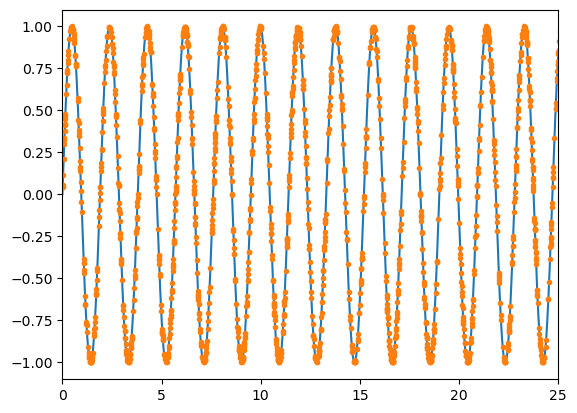

In [77]:
import numpy as np
import matplotlib.pyplot as plt

times = np.linspace(0,24*7,100000)
T=1.9
w =2*np.pi/T
signal = np.sin(times*w)
sample_indices = np.random.randint(0,len(times),10000)
sample_times = times[sample_indices]
signal_samples = signal[sample_indices]
plt.plot(times,signal,label='Signal')
plt.plot(sample_times,signal_samples,'.',label='samples')
plt.xlim(0,25)

In [87]:
# def classic_per(times,data):
#     N = len(data)
#     F = np.fft.fft(data)
#     power = 1/N*np.abs(F)**2
#     freq = np.fft.fftfreq(len(times),1/np.max(times))
#     return power, freq

def classic_per(times,data): 
    N = len(data)
    freqs = np.linspace(1e-1, 1e3,10000)
    powers = []
    for freq in freqs:
        F = np.sum(data*np.exp(2*np.pi*1j*freq*times))
        power = 1/N*np.abs(F)**2
        powers.append(power)
    powers = [power/np.max(powers) for power in powers]
    return powers, freqs

Text(0, 0.5, 'Power')

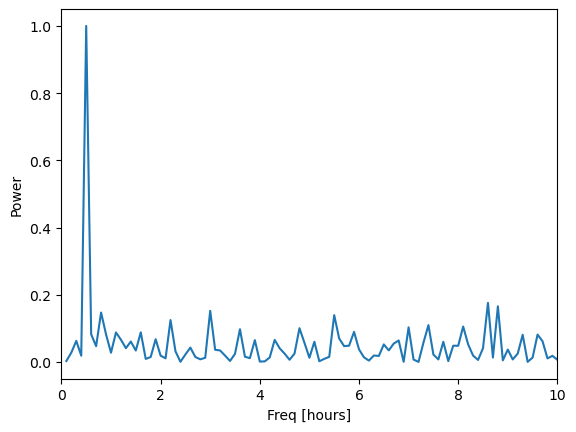

In [88]:
p_class,f_class = classic_per(sample_times,signal_samples)
plt.plot(f_class,p_class)#,'.')
plt.xlim(0,10)
plt.xlabel('Freq [hours]')
plt.ylabel('Power')
# 1/f


In [89]:
from astropy.timeseries import LombScargle

y = signal_samples
t = sample_times
dy = np.std(y)*np.ones(len(y))

ls = LombScargle(t, y, dy)
freq, power = ls.autopower()#minimum_frequency=0.1,maximum_frequency=5)
per=1/freq
# power_thresh_v=0.85*power_v.max() #for FAP calculation


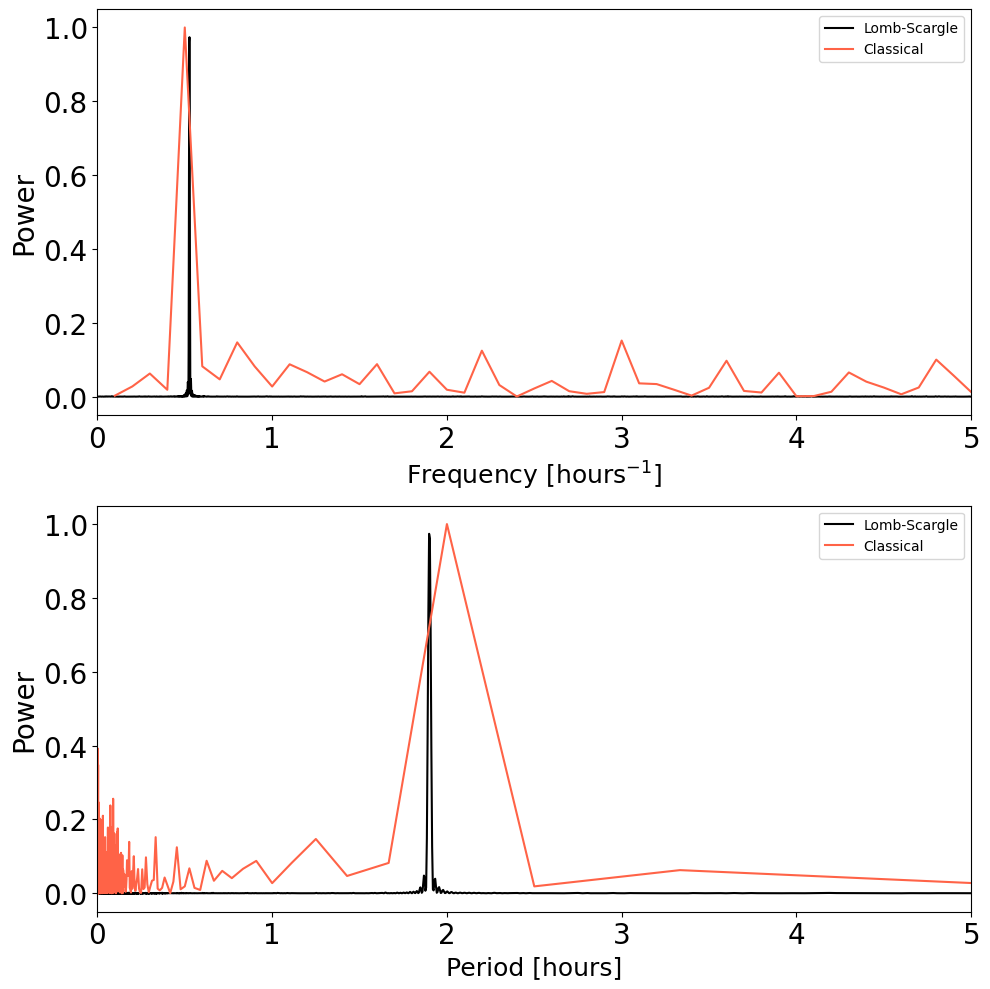

In [90]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(freq,power,color='black',label='Lomb-Scargle')
ax1.plot(f_class,p_class,color='tomato',label='Classical')

ax1.set_xlabel('Frequency [hours$^{-1}$]',fontsize = 18)
ax1.set_ylabel('Power',rotation = 90,fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.set_xlim(0,5)

ax2.plot(per,power,color='black',label='Lomb-Scargle')
ax2.plot(1/f_class,p_class,color='tomato',label='Classical')
ax2.set_xlabel('Period [hours]',fontsize = 18)
ax2.set_ylabel('Power',rotation = 90,fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax2.set_xlim(0,5)

ax1.legend()
ax2.legend()
plt.tight_layout()